# Script 1 : Generate Figure 2A

### Organize e-photosynthesis (ODE) model assimilation rate

In [1]:
import glob

ODE_Vc_dict=dict()
ODE_Vo_dict=dict()
for fname in glob.glob("LC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vc" in line:
            ODE_Vc_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vc")[1])
        if "vo" in line:
            ODE_Vo_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vo")[1])


ODE_A_dict=dict()
for k in ODE_Vc_dict.keys():
    ODE_A_dict[k] = ODE_Vc_dict[k] - (0.5*ODE_Vo_dict[k])

### Organize lightly-coupled (LC) model assimilation rate

In [2]:
import glob


LC_FBA_A_dict=dict()
for fname in glob.glob("LC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "CO2_tx1" in line:
            LC_FBA_A_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])

### Organize tightly-coupled (TC) model assimilation rate

In [3]:
import glob

TC_ODE_A_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vc" in line:
            TC_ODE_A_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vc")[1])


TC_FBA_A_dict=dict()
for fname in glob.glob("TC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "CO2_tx" in line:
            TC_FBA_A_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])


TC_A_dict=dict()
for k in TC_ODE_A_dict.keys():
    TC_A_dict[k] = TC_ODE_A_dict[k] + TC_FBA_A_dict[k]

### Data from litterature

Morgan et al data

In [4]:
Morgan = dict()
Morgan[50]=-0.48
Morgan[85]=4.3
Morgan[148]=14.1
Morgan[304]=26
Morgan[482]=30.4
Morgan[670]=31.6
Morgan[863]=30.7
Morgan[1051]=31.5
Morgan[77]=3
Morgan[144]=9.4
Morgan[206]=15.7
Morgan[273]=21.4
Morgan[427]=32.1
Morgan[605]=36.3
Morgan[787]=38.6
Morgan[968]=40.3


Sun et al data 2014

In [5]:
Sun = dict()
Sun[267]=22.4
Sun[197]=17.3
Sun[137]=10.7
Sun[76]=3.95
Sun[46.2]=0.562
Sun[272]=22.7
Sun[411]=27.9
Sun[583]=30.5
Sun[726]=30.7
Sun[852]=33.1
Sun[1.04E+03]=32.4
Sun[229]=22.6
Sun[179]=16.7
Sun[126]=10.5
Sun[72]=3.99
Sun[44.4]=-0.214
Sun[250]=23.3
Sun[380]=30.9
Sun[588]=33.1
Sun[764]=32.3
Sun[904]=34.7
Sun[1.16E+03]=35.2
Sun[275]=20.2
Sun[197]=15
Sun[137]=9.28
Sun[79.7]=3.1
Sun[50.5]=-0.361
Sun[273]=21.2
Sun[424]=25.7
Sun[608]=27.7
Sun[709]=29
Sun[831]=31.6
Sun[1.07E+03]=32.1



Zhange et al 2011

In [6]:
Zhang = dict()
Zhang[0]=-6.7
Zhang[100]=-0.76
Zhang[200]=3.1
Zhang[300]=6.2
Zhang[500]=11.7
Zhang[800]=16.4
Zhang[1200]=20.5
Zhang[1500]=21.8
Zhang[1800]=23.2
Zhang[2000]=23.5




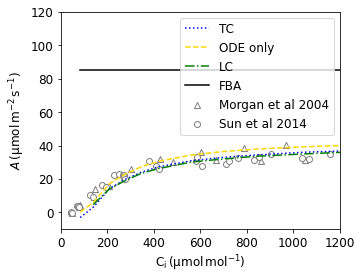

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.rcParams.update({'font.size': 12})

Clist1 = list()
Alist1 = list()
for k in sorted(TC_A_dict.keys()):
    Clist1.append(k*0.70)
    Alist1.append(TC_A_dict[k])
plt.plot(Clist1,Alist1,label="TC",linestyle=":",color="blue")

Clist2 = list()
Alist2 = list()
for k in sorted(ODE_A_dict.keys()):
    Clist2.append(k*0.70)
    Alist2.append(ODE_A_dict[k])
plt.plot(Clist2,Alist2,label="ODE only",linestyle="--",color="gold")

Clist3 = list()
Alist3 = list()
for k in sorted(LC_FBA_A_dict.keys()):
    Clist3.append(k*0.70)
    Alist3.append(LC_FBA_A_dict[k])
plt.plot(Clist3,Alist3,label="LC",linestyle="-.",color="green")

Clist4 = list()
Alist4 = list()
for k in sorted(ODE_A_dict.keys()):
    Clist4.append(k*0.70)
    Alist4.append(85.33896)
plt.plot(Clist4,Alist4,label="FBA",color="black")

ClistD1 = list()
AlistD1 = list()
for k in sorted(Morgan.keys()):
    ClistD1.append(k)
    AlistD1.append(Morgan[k])
plt.scatter(ClistD1,AlistD1,label="Morgan et al 2004",marker='^',edgecolor="grey",facecolor="white")

ClistD2 = list()
AlistD2 = list()
for k in sorted(Sun.keys()):
    ClistD2.append(k)
    AlistD2.append(Sun[k])
plt.scatter(ClistD2,AlistD2,label="Sun et al 2014",marker='o',edgecolor="grey",facecolor="white")

plt.xlim(0,1200)
plt.ylim(-10,120)
plt.xlabel(r'$\mathrm{C_i\/(\mu mol\/mol^{-1})}$')
plt.ylabel(r'$A\/\mathrm{(\mu mol\/m^{-2}\/s^{-1})}$')

plt.legend()
#plt.show()
plt.savefig("Fig3A_14Jun.svg",format="svg")

In [8]:
Alist2

[0.28401945,
 5.933072500000001,
 17.237195,
 23.105883,
 27.4884025,
 30.580845500000002,
 34.308606499999996,
 36.456647,
 37.876708,
 39.303034499999995,
 40.263531]

In [9]:
Alist1

[-3.01223114552139,
 3.1531502901041844,
 14.210730062373317,
 19.945700607567403,
 24.21952812399882,
 27.23263765011893,
 30.869392331648548,
 32.97234109187443,
 34.36729397937054,
 36.0465092754751,
 37.00434128250042]

In [10]:
Clist1

[84.0, 140.0, 210.0, 280.0, 350.0, 420.0, 560.0, 700.0, 840.0, 1050.0, 1260.0]

-----------------------------

In [11]:
for x in sorted(LC_FBA_cyclicE_dict.keys()):
    print(x)
    print(str(LC_FBA_PSI_dict[x]-LC_FBA_PSII_dict[x])+"\t"+str(TC_ODE_PSI_dict[x]-TC_ODE_PSII_dict[x]))

NameError: name 'LC_FBA_cyclicE_dict' is not defined

In [ ]:
for x in sorted(TC_ODE_PSII_dict.keys()):
    print(TC_ODE_PSI_dict[x]-TC_ODE_PSII_dict[x])